<a href="https://colab.research.google.com/github/ramakrishnan-thiyagu/Medical-Expenses-Prediction/blob/main/Medical_Expenses_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medical Expenses Prediction/med-insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [155]:
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,0.0,int64,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,0.0,object,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.0,float64,1338,NaN,NaN,NaN,30.6655,6.09838,16,26.3,30.4,34.7,53.1
children,0.0,int64,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,0.0,object,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.0,object,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expenses,0.0,float64,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [156]:
df.shape

(1338, 7)

In [157]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# **Univariate Analysis**

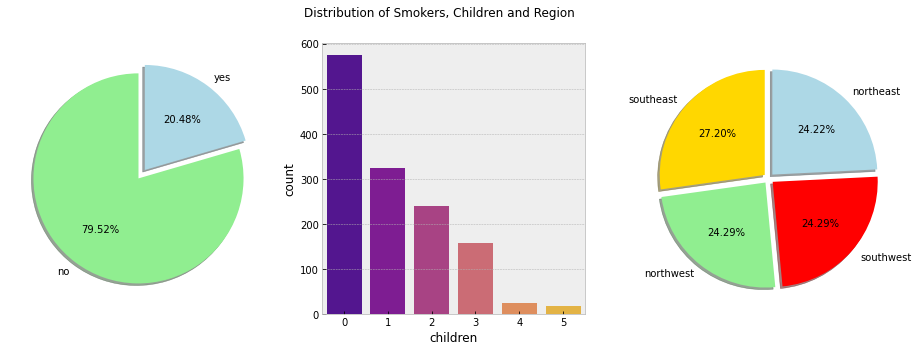

In [158]:
plt.rcParams['figure.figsize']=16,5
plt.subplot(131)
plt.pie(df['smoker'].value_counts().values,
        labels=df['smoker'].value_counts().index,
        startangle=90, explode=(0,0.1),
        colors=['lightgreen', 'lightblue'],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['children'], palette='plasma')

plt.subplot(133)
plt.pie(df['region'].value_counts().values,
        labels=df['region'].value_counts().index,
        startangle=90, shadow=True, explode=(0.05,0.05,0.05,0.05),
        colors=['gold', 'lightgreen', 'red', 'lightblue'], autopct='%1.2f%%')

plt.suptitle('Distribution of Smokers, Children and Region')
plt.show()

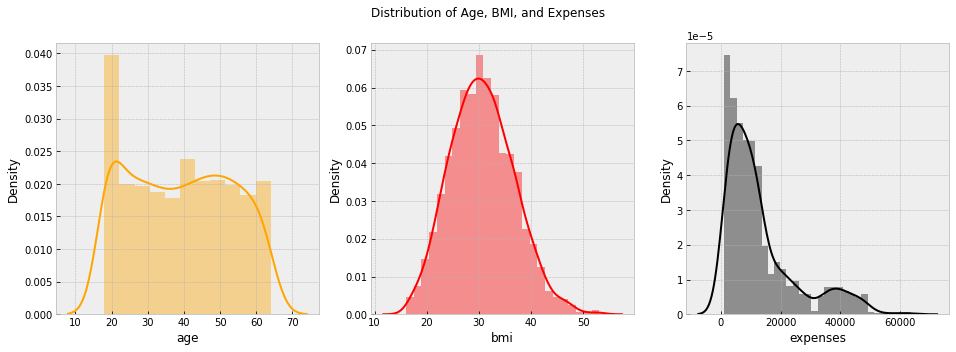

In [159]:
plt.subplot(131)
sns.distplot(df['age'], color='orange')

plt.subplot(132)
sns.distplot(df['bmi'], color='red')

plt.subplot(133)
sns.distplot(df['expenses'], color='black')

plt.suptitle('Distribution of Age, BMI, and Expenses')
plt.show()

# **Bivariate Analysis**

In [160]:
px.scatter(data_frame=df, x='age', y='expenses',
           trendline="ols", marginal_y='violin')

In [161]:
px.scatter(data_frame=df, x='bmi', y='expenses',
           trendline="ols", marginal_y='violin')

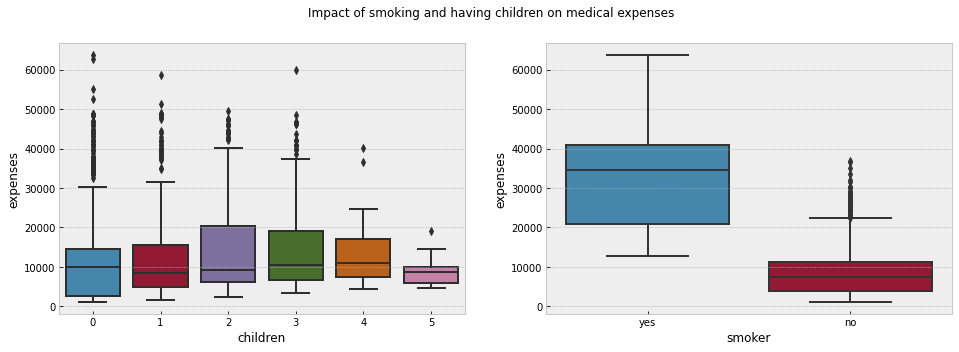

In [162]:
plt.subplot(121)
sns.boxplot(df['children'], df['expenses'])

plt.subplot(122)
sns.boxplot(df['smoker'], df['expenses'])

plt.suptitle('Impact of smoking and having children on medical expenses')
plt.show()

In [163]:
df['children'].values[df['children'].values>3]=3

# **Multivariate Analysis**

In [164]:
px.scatter(df, x='expenses', y='age',
           color='smoker', trendline='ols',
           facet_row='children', facet_col='region')

In [165]:
px.scatter(df, x='expenses', y='bmi',
           color='smoker', trendline='ols',
           facet_row='children', facet_col='region')

In [166]:
px.scatter(df, x='expenses',
           y='bmi', size='age',
           color='smoker', size_max=15)

In [167]:
px.bar_polar(df, r='expenses', theta='region', color='sex')

In [168]:
df[['expenses', 'region']].groupby(['region']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

# **Data Preprocessing**
* Let's Encode the categorical features
* As per our data analysis we can see male's medical expenses and higher when compared with female
* Smoker's having higher expenses than non smokers
* Southeast people having higher medical expenses
* So we are going to encode based on our analysis result

In [169]:
df['sex']=df['sex'].replace(('male', 'female'), (2,1))
df['smoker']=df['smoker'].replace(('yes', 'no'), (2,1))
df['region']=df['region'].replace(('southeast', 'northeast','northwest','southwest'), (2,1,1,1))
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [170]:
x=df.drop(['expenses'], axis=1)
y=df['expenses']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


# **Feature Scaling**

In [172]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Predictive Modeling**

**Linear Regression**

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_LR=LinearRegression()
model_LR.fit(X_train, y_train)

y_pred_LR=model_LR.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

R2_score = r2_score(y_test, y_pred_LR)
print('R2 Score : ', R2_score)
#print(f"R2 Score : {model_LR.score(X_test,y_test)}")

RMSE Score : 5665.098223602283
R2 Score :  0.7983199562954781


**Random Forest**

In [174]:
from sklearn.ensemble import RandomForestRegressor

model_RF=RandomForestRegressor()
model_RF.fit(X_train, y_train)

y_pred_RF=model_RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

R2_score = r2_score(y_test, y_pred_RF)
print('R2 Score : ', R2_score)
#print(f"R2 Score : {model_RF.score(X_test,y_test)}")

RMSE Score : 4466.217795441659
R2 Score :  0.874648991138079


**Gradient Boosting**

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB=GradientBoostingRegressor()
model_GB.fit(X_train, y_train)

y_pred_GB=model_GB.predict(X_test)

mse = mean_squared_error(y_test, y_pred_GB)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

R2_score = r2_score(y_test, y_pred_GB)
print('R2 Score : ', R2_score)
#print(f"R2 Score : {model_GB.score(X_test,y_test)}")

RMSE Score : 4093.2715100014866
R2 Score :  0.8947095107441357


**XG Boosting**

In [176]:
from xgboost import XGBRegressor

model_XG=XGBRegressor()
model_XG.fit(X_train, y_train)

y_pred_XG=model_XG.predict(X_test)

mse = mean_squared_error(y_test, y_pred_XG)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

R2_score = r2_score(y_test, y_pred_XG)
print('R2 Score : ', R2_score)
#print(f"R2 Score : {model_XG.score(X_test,y_test)}")

[08:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score : 4069.8755128904168
R2 Score :  0.8959096930392904


**Ensembling models**

In [177]:
from sklearn.metrics import r2_score
avg_model = (y_pred_LR + y_pred_RF + y_pred_GB + y_pred_XG)/4

mse = mean_squared_error(y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

R2_score = r2_score(y_test, avg_model)
print('R2 Score : ', R2_score)

RMSE Score : 4200.984831548486
R2 Score :  0.8890952198605613


**weighted averaging model**

In [178]:
weight_avg_model = 0.1*y_pred_LR + 0.2*y_pred_RF + 0.3*y_pred_GB + 0.4*y_pred_XG

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

R2_score = r2_score(y_test, weight_avg_model)
print("R2 Score :",R2_score)

RMSE Score : 4102.435169919349
R2 Score : 0.8942375526828903


**Cross Validation**

In [179]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_XG, x, y, cv=5)
print(scores)

[08:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.87589331 0.79501686 0.89292051 0.85074477 0.8565918 ]


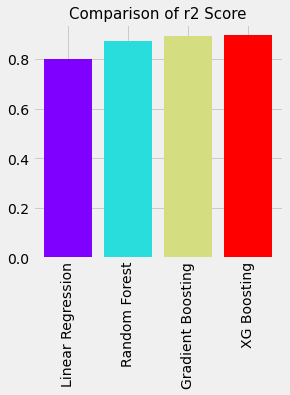

In [187]:
r2_score = np.array([0.798, 0.874, 0.894, 0.895])
labels = np.array(['Linear Regression', 'Random Forest' 'Gradient Boosting', 'XG Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4, 8))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 4), ['Linear Regression', 'Random Forest','Gradient Boosting', 'XG Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()